1. ЗАГРУЗКА И АНАЛИЗ ДАННЫХ
Размер датасета: (18000, 39)
Столбцы: ['id', 'f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f08', 'f09', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'x_int_1', 'x_int_2', 'target']

Первые 5 строк:
   id       f01       f02       f03        f04       f05       f06       f07  \
0   1 -0.149235 -2.826966 -0.522901  -4.198449  1.364943  0.815043 -1.195518   
1   2 -1.966180 -4.877542  0.268367  -9.607791  0.097149  1.347185 -3.872575   
2   3 -0.555964 -0.999920  0.209673 -14.119498 -1.808950 -0.006222 -4.651108   
3   4 -2.049199 -5.600713 -1.664677  -6.263893 -5.224455  0.848351  1.407210   
4   5 -0.220556  4.889479 -2.235840   6.450046  0.774389 -2.382625  2.584816   

        f08       f09  ...       f29       f30       f31       f32       f33  \
0 -1.932232  2.396353  ... -0.159323  0.448015  0.572745  0.149916  0.87

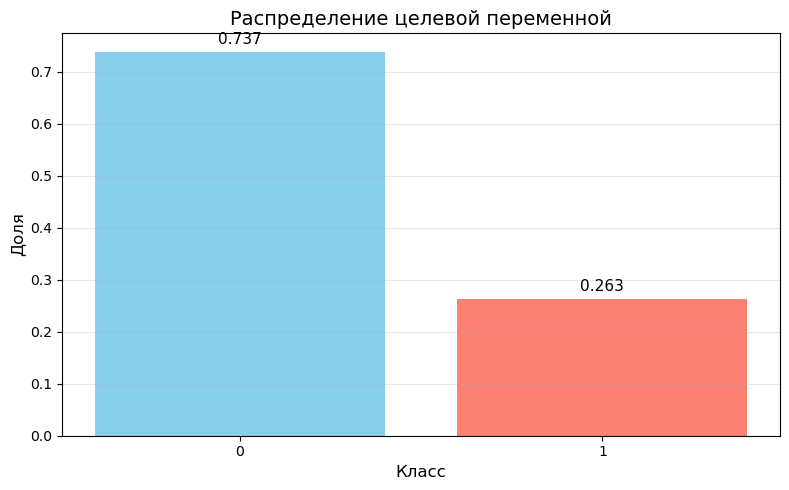


Пропуски в данных:
0

Количество числовых признаков: 37
Категориальные-подобные признаки: []

2. ПОДГОТОВКА ДАННЫХ
Размер X: (18000, 37)
Размер y: (18000,)

Разделение данных:
Train: (13500, 37) (75.0%)
Test:  (4500, 37) (25.0%)

Распределение классов в train: класс 0: 0.737, класс 1: 0.263
Распределение классов в test:  класс 0: 0.737, класс 1: 0.263

3. БАЗОВЫЕ МОДЕЛИ (BASELINE)

DummyClassifier:
  Accuracy: 0.6180
  F1-score: 0.2644
  ROC-AUC:  0.5032

LogisticRegression:
  Accuracy: 0.8162
  F1-score: 0.5717
  ROC-AUC:  0.8009

4. МОДЕЛИ НЕДЕЛИ 6

--- DecisionTreeClassifier ---
Поиск лучших параметров для DecisionTree...
Лучшие параметры: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
Лучший ROC-AUC на CV: 0.8232

DecisionTree:
  Accuracy: 0.8238
  F1-score: 0.6337
  ROC-AUC:  0.8289

--- RandomForestClassifier ---
Поиск лучших параметров для RandomForest...
Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}

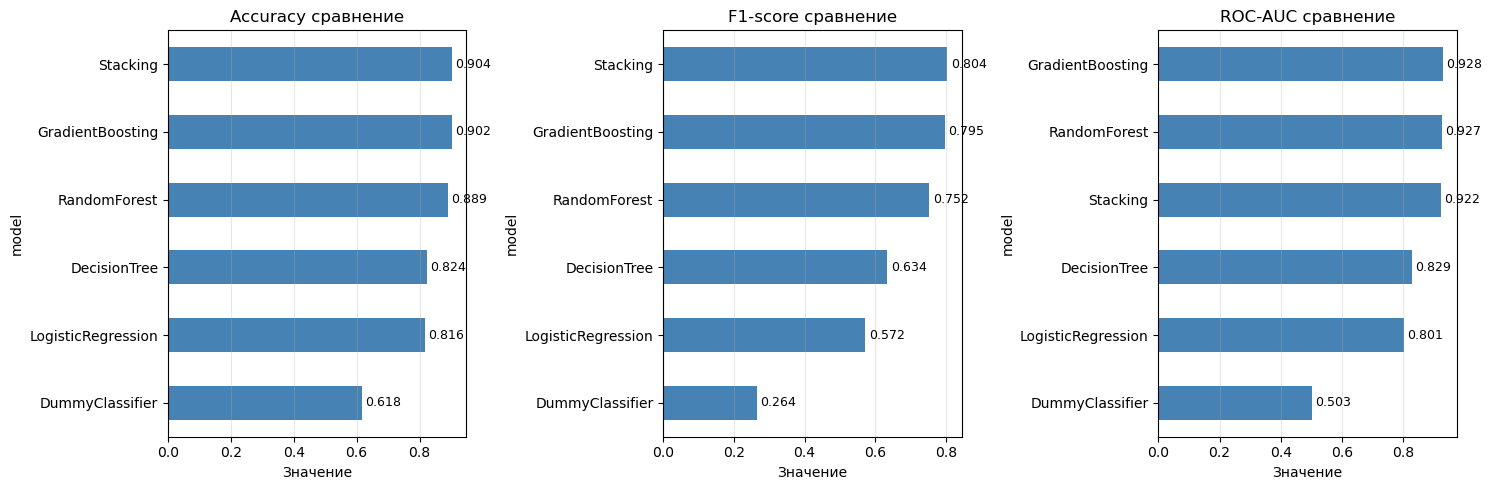


Лучшая модель: GradientBoosting
ROC-AUC: 0.9282
F1-score: 0.7955

6. ДИАГНОСТИКА ЛУЧШЕЙ МОДЕЛИ: GradientBoosting

Confusion Matrix:


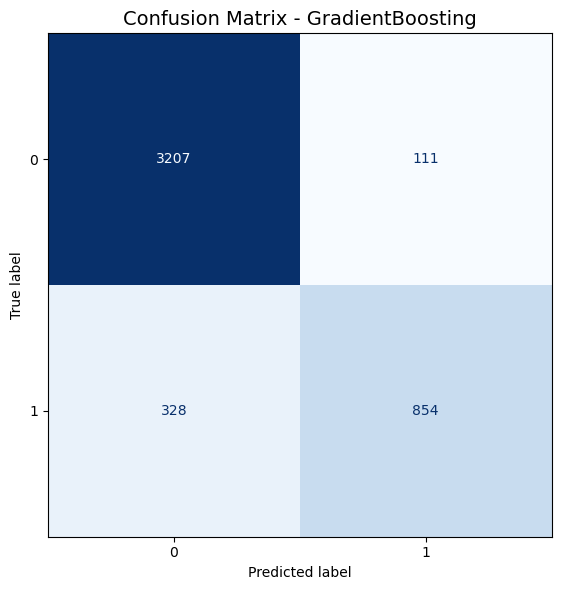

TN: 3207, FP: 111
FN: 328, TP: 854

ROC-кривая:


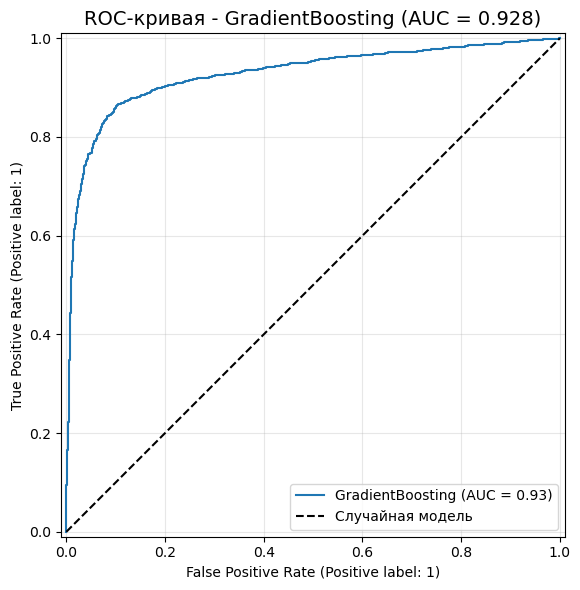


Permutation Importance (топ-15 признаков):


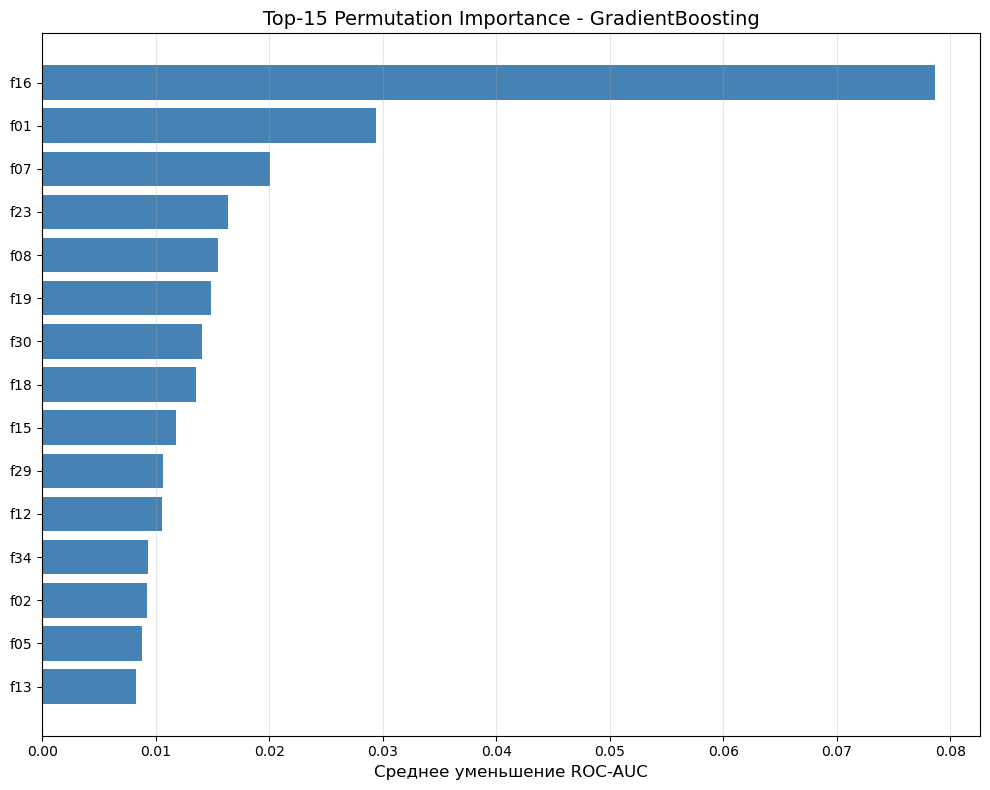


Топ-5 самых важных признаков:
  1. f16: 0.0787
  2. f01: 0.0294
  3. f07: 0.0200
  4. f23: 0.0163
  5. f08: 0.0155

7. АНАЛИЗ УСТОЙЧИВОСТИ (5 прогонов)
Random_state=42: ROC-AUC = 0.9215
Random_state=123: ROC-AUC = 0.9239
Random_state=321: ROC-AUC = 0.9273
Random_state=777: ROC-AUC = 0.9263
Random_state=999: ROC-AUC = 0.9248

Средний ROC-AUC: 0.9247
Стандартное отклонение: 0.0020
Разброс: 0.0058

8. СОХРАНЕНИЕ АРТЕФАКТОВ
metrics_test.json сохранен
search_summaries.json сохранен
best_model.joblib сохранен (GradientBoosting)
best_model_meta.json сохранен


In [1]:
# ============================================
# HW06 - Сравнение моделей классификации
# Датасет: S06-hw-dataset-02.csv
# ============================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, 
    confusion_matrix, ConfusionMatrixDisplay, 
    roc_curve, RocCurveDisplay
)
from sklearn.inspection import permutation_importance
import json
import joblib
import warnings
warnings.filterwarnings('ignore')

# Фиксируем случайность для воспроизводимости
np.random.seed(42)

# Создаем необходимые папки
os.makedirs('artifacts/figures', exist_ok=True)
os.makedirs('artifacts', exist_ok=True)

# ============================================
# 1. ЗАГРУЗКА ДАННЫХ И ПЕРВИЧНЫЙ АНАЛИЗ
# ============================================

print("=" * 60)
print("1. ЗАГРУЗКА И АНАЛИЗ ДАННЫХ")
print("=" * 60)

# Загрузка данных
df = pd.read_csv('S06-hw-dataset-02.csv')
print(f"Размер датасета: {df.shape}")
print(f"Столбцы: {list(df.columns)}")

# Первичный анализ
print("\nПервые 5 строк:")
print(df.head())

print("\nИнформация о данных:")
print(df.info())

print("\nБазовые статистики:")
print(df.describe())

# Анализ целевой переменной
print("\nРаспределение целевой переменной 'target':")
target_counts = df['target'].value_counts()
target_dist = df['target'].value_counts(normalize=True)
print(f"Класс 0: {target_dist[0]:.3f} ({target_counts[0]} samples)")
print(f"Класс 1: {target_dist[1]:.3f} ({target_counts[1]} samples)")

# Визуализация распределения таргета
plt.figure(figsize=(8, 5))
bars = plt.bar(target_dist.index, target_dist.values, color=['skyblue', 'salmon'])
plt.title('Распределение целевой переменной', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Доля', fontsize=12)
plt.xticks([0, 1])
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи значений
for bar, value in zip(bars, target_dist.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('artifacts/figures/target_distribution.png', dpi=100)
plt.show()

# Проверка пропусков
print("\nПропуски в данных:")
print(df.isnull().sum().sum())

# Типы признаков
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('id')
numerical_cols.remove('target')
print(f"\nКоличество числовых признаков: {len(numerical_cols)}")

# Категориальные-подобные признаки (целые с малым числом уникальных значений)
categorical_like = []
for col in df.columns:
    if col not in ['id', 'target'] and df[col].dtype in ['int64']:
        if df[col].nunique() < 10:
            categorical_like.append(col)
print(f"Категориальные-подобные признаки: {categorical_like}")

# ============================================
# 2. ПОДГОТОВКА ДАННЫХ
# ============================================

print("\n" + "=" * 60)
print("2. ПОДГОТОВКА ДАННЫХ")
print("=" * 60)

# Разделяем на признаки и целевую переменную
X = df.drop(['id', 'target'], axis=1)  # id не используем как признак
y = df['target']

print(f"Размер X: {X.shape}")
print(f"Размер y: {y.shape}")

# Train/Test split с фиксированным random_state и стратификацией
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42,
    stratify=y  # сохраняем распределение классов
)

print(f"\nРазделение данных:")
print(f"Train: {X_train.shape} ({(len(X_train)/len(X))*100:.1f}%)")
print(f"Test:  {X_test.shape} ({(len(X_test)/len(X))*100:.1f}%)")

# Исправленная часть с форматированием
train_dist = np.bincount(y_train) / len(y_train)
test_dist = np.bincount(y_test) / len(y_test)
print(f"\nРаспределение классов в train: класс 0: {train_dist[0]:.3f}, класс 1: {train_dist[1]:.3f}")
print(f"Распределение классов в test:  класс 0: {test_dist[0]:.3f}, класс 1: {test_dist[1]:.3f}")

# ============================================
# 3. БАЗОВЫЕ МОДЕЛИ (BASELINE)
# ============================================

print("\n" + "=" * 60)
print("3. БАЗОВЫЕ МОДЕЛИ (BASELINE)")
print("=" * 60)

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Функция для вычисления и сохранения метрик
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, save_results=False):
    """Оценка модели и сохранение результатов"""
    # Обучение
    model.fit(X_train, y_train)
    
    # Предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Метрики
    metrics = {
        'model': model_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
    }
    
    if y_pred_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
    
    # Вывод результатов
    print(f"\n{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1-score: {metrics['f1']:.4f}")
    if 'roc_auc' in metrics:
        print(f"  ROC-AUC:  {metrics['roc_auc']:.4f}")
    
    return metrics

# Словарь для хранения всех метрик
all_metrics = {}

# 3.1 DummyClassifier (самый простой бейзлайн)
dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy_metrics = evaluate_model(dummy, 'DummyClassifier', X_train, X_test, y_train, y_test)
all_metrics['DummyClassifier'] = dummy_metrics

# 3.2 LogisticRegression (более разумный бейзлайн)
# Используем Pipeline со StandardScaler
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
])

lr_metrics = evaluate_model(lr_pipeline, 'LogisticRegression', X_train, X_test, y_train, y_test)
all_metrics['LogisticRegression'] = lr_metrics

# ============================================
# 4. МОДЕЛИ НЕДЕЛИ 6
# ============================================

print("\n" + "=" * 60)
print("4. МОДЕЛИ НЕДЕЛИ 6")
print("=" * 60)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold

# 4.1 DecisionTreeClassifier с контролем сложности
print("\n--- DecisionTreeClassifier ---")

# Настройка GridSearchCV для дерева
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(
    dt, param_grid_dt, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

print("Поиск лучших параметров для DecisionTree...")
grid_dt.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_dt.best_params_}")
print(f"Лучший ROC-AUC на CV: {grid_dt.best_score_:.4f}")

# Оценка лучшей модели на тесте
best_dt = grid_dt.best_estimator_
dt_metrics = evaluate_model(best_dt, 'DecisionTree', X_train, X_test, y_train, y_test)
dt_metrics['best_params'] = str(grid_dt.best_params_)
dt_metrics['cv_score'] = float(grid_dt.best_score_)
all_metrics['DecisionTree'] = dt_metrics

# 4.2 RandomForestClassifier
print("\n--- RandomForestClassifier ---")

# Упрощенная сетка для скорости
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_rf = GridSearchCV(
    rf, param_grid_rf,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # меньше фолдов для скорости
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

print("Поиск лучших параметров для RandomForest...")
grid_rf.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_rf.best_params_}")
print(f"Лучший ROC-AUC на CV: {grid_rf.best_score_:.4f}")

best_rf = grid_rf.best_estimator_
rf_metrics = evaluate_model(best_rf, 'RandomForest', X_train, X_test, y_train, y_test)
rf_metrics['best_params'] = str(grid_rf.best_params_)
rf_metrics['cv_score'] = float(grid_rf.best_score_)
all_metrics['RandomForest'] = rf_metrics

# 4.3 GradientBoostingClassifier
print("\n--- GradientBoostingClassifier ---")

param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_leaf': [1, 3]
}

gb = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(
    gb, param_grid_gb,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

print("Поиск лучших параметров для GradientBoosting...")
grid_gb.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_gb.best_params_}")
print(f"Лучший ROC-AUC на CV: {grid_gb.best_score_:.4f}")

best_gb = grid_gb.best_estimator_
gb_metrics = evaluate_model(best_gb, 'GradientBoosting', X_train, X_test, y_train, y_test)
gb_metrics['best_params'] = str(grid_gb.best_params_)
gb_metrics['cv_score'] = float(grid_gb.best_score_)
all_metrics['GradientBoosting'] = gb_metrics

# 4.4 StackingClassifier (опционально)
print("\n--- StackingClassifier ---")

# Базовые модели для стекинга
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)),
]

# Мета-модель
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Создаем стекинг
stacking = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1
)

# Обучаем и оцениваем
stacking_metrics = evaluate_model(stacking, 'Stacking', X_train, X_test, y_train, y_test)
all_metrics['Stacking'] = stacking_metrics

# ============================================
# 5. СРАВНЕНИЕ РЕЗУЛЬТАТОВ
# ============================================

print("\n" + "=" * 60)
print("5. СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("=" * 60)

# Создаем DataFrame с результатами
# Сначала преобразуем словарь в формат для DataFrame
results_data = []
for model_name, metrics in all_metrics.items():
    row = {'model': model_name}
    row.update({k: v for k, v in metrics.items() if k != 'model'})
    results_data.append(row)

results_df = pd.DataFrame(results_data)
results_df = results_df.set_index('model')

# Убедимся, что все числовые колонки присутствуют
for col in ['accuracy', 'f1', 'roc_auc']:
    if col not in results_df.columns:
        results_df[col] = np.nan

if 'cv_score' not in results_df.columns:
    results_df['cv_score'] = np.nan

# Отображаем только нужные колонки
display_cols = ['accuracy', 'f1', 'roc_auc', 'cv_score']
results_display = results_df[display_cols].round(4)

print("\nСравнение моделей на тестовой выборке:")
print(results_display)

# Визуализация сравнения
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_to_plot = ['accuracy', 'f1', 'roc_auc']
titles = ['Accuracy', 'F1-score', 'ROC-AUC']

for idx, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
    ax = axes[idx]
    # Сортируем по значению метрики
    sorted_series = results_display[metric].sort_values()
    sorted_series.plot(kind='barh', ax=ax, color='steelblue')
    ax.set_title(f'{title} сравнение', fontsize=12)
    ax.set_xlabel('Значение', fontsize=10)
    ax.grid(axis='x', alpha=0.3)
    
    # Добавляем значения на столбцы
    for i, v in enumerate(sorted_series):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('artifacts/figures/models_comparison.png', dpi=100)
plt.show()

# Определяем лучшую модель по ROC-AUC (игнорируем модели без ROC-AUC)
models_with_roc = results_display[results_display['roc_auc'].notna()]
if not models_with_roc.empty:
    best_model_name = models_with_roc['roc_auc'].idxmax()
    best_model_metrics = results_display.loc[best_model_name]
    print(f"\nЛучшая модель: {best_model_name}")
    print(f"ROC-AUC: {best_model_metrics['roc_auc']:.4f}")
    print(f"F1-score: {best_model_metrics['f1']:.4f}")
else:
    best_model_name = results_display['f1'].idxmax()
    best_model_metrics = results_display.loc[best_model_name]
    print(f"\nЛучшая модель (по F1): {best_model_name}")
    print(f"F1-score: {best_model_metrics['f1']:.4f}")

# ============================================
# 6. ДИАГНОСТИКА ЛУЧШЕЙ МОДЕЛИ
# ============================================

print("\n" + "=" * 60)
print(f"6. ДИАГНОСТИКА ЛУЧШЕЙ МОДЕЛИ: {best_model_name}")
print("=" * 60)

# Получаем объект лучшей модели
if best_model_name == 'DecisionTree':
    best_model = best_dt
elif best_model_name == 'RandomForest':
    best_model = best_rf
elif best_model_name == 'GradientBoosting':
    best_model = best_gb
elif best_model_name == 'Stacking':
    best_model = stacking
elif best_model_name == 'LogisticRegression':
    best_model = lr_pipeline
else:
    best_model = dummy

# 6.1 Confusion Matrix
print("\nConfusion Matrix:")
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.savefig('artifacts/figures/best_model_confusion_matrix.png', dpi=100)
plt.show()

print(f"TN: {cm[0,0]}, FP: {cm[0,1]}")
print(f"FN: {cm[1,0]}, TP: {cm[1,1]}")

# 6.2 ROC-кривая
print("\nROC-кривая:")
if hasattr(best_model, 'predict_proba'):
    try:
        y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
        roc_auc = roc_auc_score(y_test, y_pred_proba_best)
        
        fig, ax = plt.subplots(figsize=(8, 6))
        RocCurveDisplay.from_predictions(y_test, y_pred_proba_best, ax=ax, name=best_model_name)
        plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель')
        plt.title(f'ROC-кривая - {best_model_name} (AUC = {roc_auc:.3f})', fontsize=14)
        plt.legend(loc='lower right')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig('artifacts/figures/best_model_roc_curve.png', dpi=100)
        plt.show()
    except Exception as e:
        print(f"Не удалось построить ROC-кривую: {e}")

# 6.3 Permutation Importance
print("\nPermutation Importance (топ-15 признаков):")

# Вычисляем важность признаков
if hasattr(best_model, 'predict_proba') and best_model_name not in ['DummyClassifier']:
    try:
        result = permutation_importance(
            best_model, X_test, y_test,
            n_repeats=10,
            random_state=42,
            scoring='roc_auc',
            n_jobs=-1
        )
        
        # Сортируем по важности
        importances = result.importances_mean
        indices = np.argsort(importances)[::-1]
        
        # Визуализация топ-15
        top_n = min(15, len(importances))
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.barh(range(top_n), importances[indices[:top_n]][::-1], color='steelblue')
        ax.set_yticks(range(top_n))
        ax.set_yticklabels([X.columns[i] for i in indices[:top_n]][::-1])
        ax.set_xlabel('Среднее уменьшение ROC-AUC', fontsize=12)
        ax.set_title(f'Top-{top_n} Permutation Importance - {best_model_name}', fontsize=14)
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.savefig('artifacts/figures/best_model_permutation_importance.png', dpi=100)
        plt.show()
        
        # Выводим топ-5 признаков
        print("\nТоп-5 самых важных признаков:")
        for i in range(min(5, len(importances))):
            print(f"  {i+1}. {X.columns[indices[i]]}: {importances[indices[i]]:.4f}")
    except Exception as e:
        print(f"Не удалось вычислить permutation importance: {e}")
else:
    print("Для этой модели permutation importance не вычисляется")

# ============================================
# 7. АНАЛИЗ УСТОЙЧИВОСТИ
# ============================================

print("\n" + "=" * 60)
print("7. АНАЛИЗ УСТОЙЧИВОСТИ (5 прогонов)")
print("=" * 60)

# Проверяем устойчивость на 5 разных random_state
random_states = [42, 123, 321, 777, 999]
roc_auc_scores = []

for i, rs in enumerate(random_states):
    # Повторяем split с другим random_state
    X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(
        X, y, test_size=0.25, random_state=rs, stratify=y
    )
    
    # Обучаем модель (возьмем RandomForest с дефолтными параметрами для скорости)
    model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    model.fit(X_train_rs, y_train_rs)
    
    # Оцениваем
    y_pred_proba = model.predict_proba(X_test_rs)[:, 1]
    roc_auc = roc_auc_score(y_test_rs, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    
    print(f"Random_state={rs}: ROC-AUC = {roc_auc:.4f}")

print(f"\nСредний ROC-AUC: {np.mean(roc_auc_scores):.4f}")
print(f"Стандартное отклонение: {np.std(roc_auc_scores):.4f}")
print(f"Разброс: {np.max(roc_auc_scores) - np.min(roc_auc_scores):.4f}")

# ============================================
# 8. СОХРАНЕНИЕ АРТЕФАКТОВ
# ============================================

print("\n" + "=" * 60)
print("8. СОХРАНЕНИЕ АРТЕФАКТОВ")
print("=" * 60)

# Создаем папку artifacts/figures если её нет
import os
os.makedirs('artifacts/figures', exist_ok=True)

# 8.1 Сохраняем метрики
# Преобразуем DataFrame в словарь для JSON
metrics_dict = results_display.to_dict(orient='index')
with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(metrics_dict, f, indent=2)
print("metrics_test.json сохранен")

# 8.2 Сохраняем информацию о подборе гиперпараметров
search_summaries = {}
if 'DecisionTree' in all_metrics and 'best_params' in all_metrics['DecisionTree']:
    search_summaries['DecisionTree'] = {
        'best_params': all_metrics['DecisionTree'].get('best_params', 'N/A'),
        'best_cv_score': all_metrics['DecisionTree'].get('cv_score', 'N/A')
    }
if 'RandomForest' in all_metrics and 'best_params' in all_metrics['RandomForest']:
    search_summaries['RandomForest'] = {
        'best_params': all_metrics['RandomForest'].get('best_params', 'N/A'),
        'best_cv_score': all_metrics['RandomForest'].get('cv_score', 'N/A')
    }
if 'GradientBoosting' in all_metrics and 'best_params' in all_metrics['GradientBoosting']:
    search_summaries['GradientBoosting'] = {
        'best_params': all_metrics['GradientBoosting'].get('best_params', 'N/A'),
        'best_cv_score': all_metrics['GradientBoosting'].get('cv_score', 'N/A')
    }

with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=2)
print("search_summaries.json сохранен")

# 8.3 Сохраняем лучшую модель
try:
    joblib.dump(best_model, 'artifacts/best_model.joblib')
    print(f"best_model.joblib сохранен ({best_model_name})")
except Exception as e:
    print(f"Не удалось сохранить модель: {e}")

# 8.4 Сохраняем метаданные лучшей модели
best_model_meta = {
    'model_name': best_model_name,
    'test_metrics': {
        'accuracy': float(best_model_metrics.get('accuracy', 0)),
        'f1': float(best_model_metrics.get('f1', 0)),
        'roc_auc': float(best_model_metrics.get('roc_auc', 0))
    }
}

# Добавляем информацию о параметрах, если есть
if best_model_name in search_summaries:
    best_model_meta['best_params'] = search_summaries[best_model_name]['best_params']
    best_model_meta['cv_score'] = search_summaries[best_model_name]['best_cv_score']

with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_model_meta, f, indent=2)
print("best_model_meta.json сохранен")